# Setup and Datasets Load

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# --- Configuration ---
MEMBER_INFO_FILE = 'member_information(in).csv'
LOAN_SCHEDULE_FILE = 'loan_schedules(in).csv'
LOAN_HISTORY_FILE = 'loan_schedule_with_transaction_history(in).csv'

# --- Load Datasets ---
try:
    # Load member information
    member_info_df = pd.read_csv(
        MEMBER_INFO_FILE,
        parse_dates=['admission_date'],
        dayfirst=False
    )
    member_info_df = member_info_df.rename(columns={'id': 'member_id'})  # 'id' is renamed to 'member_id'

    # Load loan schedules
    loan_schedules_df = pd.read_csv(
        LOAN_SCHEDULE_FILE,
        parse_dates=['date', 'created_at', 'updated_at'],
        dayfirst=False
    )

    # Load loan transaction history
    history_df = pd.read_csv(
        LOAN_HISTORY_FILE,
        parse_dates=['date', 'created_at', 'updated_at', 'last_schedule_date'],
        dayfirst=False,
        low_memory=False
    )

    print("Data loaded successfully.")

except Exception as e:
    print(f"An error occurred during data loading: {e}")
    assert False, f"Data loading error: {e}"


Data loaded successfully.


# Data Analysis

In [6]:
# Step 1: Display basic info (shape, data types, top rows)
print("\n--- Data Analysis for Member Information ---")
print(f"Data Shape: {member_info_df.shape}")  # Rows and columns


--- Data Analysis for Member Information ---
Data Shape: (2876, 5)


In [7]:
print(f"Data Types:\n{member_info_df.dtypes}")  # Data types of each column

Data Types:
member_id                  int64
name                      object
code                      object
admission_date    datetime64[ns]
status                    object
dtype: object


In [8]:
print(f"Top 5 Rows:\n{member_info_df.head()}\n")  # Display top 5 rows

Top 5 Rows:
   member_id     name           code admission_date       status
0     585998   Morzna  0469-008-0006     2012-11-12  Transferred
1     587849  Rasheda  0469-024-0007     2014-02-05       Closed
2     587858     Alea  0469-024-0023     2015-06-06       Closed
3     588060     Runa  0469-030-0004     2014-09-16       Closed
4     588138   Helena  0469-030-0001     2014-09-16       Closed



In [9]:
print(f"Summary Statistics:\n{member_info_df.describe()}\n")  # Summary statistics for numeric columns

Summary Statistics:
          member_id
count  2.876000e+03
mean   5.504265e+06
std    1.532812e+06
min    5.859980e+05
25%    4.805236e+06
50%    5.841268e+06
75%    6.682924e+06
max    7.681662e+06



In [10]:
print(f"Missing Values:\n{member_info_df.isnull().sum()}\n")  # Missing values per column

Missing Values:
member_id         0
name              0
code              0
admission_date    0
status            0
dtype: int64



In [11]:
# Step 2: Display basic info (shape, data types, top rows)
print("\n--- Data Analysis for Loan Information ---")
print(f"Data Shape: {loan_schedules_df.shape}")  # Rows and columns


--- Data Analysis for Loan Information ---
Data Shape: (63582, 14)


In [13]:
print(f"Data Types:\n{loan_schedules_df.dtypes}")  # Data types of each column

Data Types:
id                         int64
branch_id                  int64
product_id                 int64
loan_id                    int64
date              datetime64[ns]
inst_no                    int64
inst_amount_pr           float64
inst_amount_sc           float64
created_at        datetime64[ns]
updated_at        datetime64[ns]
id_old                   float64
branch_id_old            float64
product_id_old           float64
loan_id_old              float64
dtype: object


In [14]:
print(f"Top 5 Rows:\n{loan_schedules_df.head()}\n")  # Display top 5 rows

Top 5 Rows:
         id  branch_id  product_id  loan_id       date  inst_no  \
0  15280878        300           1  7068073 2023-09-18       11   
1  15280879        300           1  7068073 2023-10-18       12   
2  15282468        300           1  7508677 2023-09-25       12   
3  15282902        300           1  7562871 2023-09-10       11   
4  15282903        300           1  7562871 2023-10-10       12   

   inst_amount_pr  inst_amount_sc          created_at          updated_at  \
0     4162.995595      562.004405 2023-11-05 18:11:00 2023-11-05 18:11:00   
1     4207.048458      567.951542 2023-11-05 18:11:00 2023-11-05 18:11:00   
2     4207.048458      567.951542 2023-11-05 18:11:00 2023-11-05 18:11:00   
3     4162.995595      562.004405 2023-11-05 18:11:00 2023-11-05 18:11:00   
4     4207.048458      567.951542 2023-11-05 18:11:00 2023-11-05 18:11:00   

   id_old  branch_id_old  product_id_old  loan_id_old  
0     NaN            NaN             NaN          NaN  
1     NaN 

In [15]:
print(f"Summary Statistics:\n{loan_schedules_df.describe()}\n")  # Summary statistics for numeric columns

Summary Statistics:
                 id  branch_id    product_id       loan_id       inst_no  \
count  6.358200e+04    63582.0  63582.000000  6.358200e+04  63582.000000   
mean   8.193653e+07      300.0     98.586943  9.921811e+06     25.473404   
std    3.718862e+07        0.0     53.598783  9.997339e+05     13.535189   
min    1.527720e+07      300.0      1.000000  4.694039e+06      1.000000   
25%    7.283172e+07      300.0    105.000000  9.193496e+06     13.000000   
50%    8.398769e+07      300.0    105.000000  1.009378e+07     27.000000   
75%    1.099948e+08      300.0    111.000000  1.064455e+07     38.000000   
max    1.335733e+08      300.0    181.000000  1.159832e+07     46.000000   

       inst_amount_pr  inst_amount_sc  id_old  branch_id_old  product_id_old  \
count    63582.000000    63582.000000     0.0            0.0             0.0   
mean      2221.916539      297.455216     NaN            NaN             NaN   
std       4225.723266      614.864328     NaN          

In [16]:
print(f"Missing Values:\n{loan_schedules_df.isnull().sum()}\n")  # Missing values per column

Missing Values:
id                    0
branch_id             0
product_id            0
loan_id               0
date                  0
inst_no               0
inst_amount_pr        0
inst_amount_sc        0
created_at            0
updated_at            0
id_old            63582
branch_id_old     63582
product_id_old    63582
loan_id_old       63582
dtype: int64



In [17]:
# Step 3: Display basic info (shape, data types, top rows)
print("\n--- Data Analysis for Loan Schedule with Transaction History ---")


--- Data Analysis for Loan Schedule with Transaction History ---


In [18]:
print(f"Data Shape: {history_df.shape}")  # Rows and columns

Data Shape: (75378, 54)


In [19]:
print(f"Data Types:\n{history_df.dtypes}")  # Data types of each column

Data Types:
id                                         int64
branch_id                                  int64
emp_id                                     int64
center_id                                  int64
member_id                                  int64
member_code                               object
member_name                               object
product_id                                 int64
loan_id                                    int64
app_collection_id                          int64
loan_code                                 object
loan_amount                                int64
total_repay_amount                       float64
cum_collection_pr                        float64
cum_collection_sc                        float64
cum_recoverable_pr                       float64
cum_recoverable_sc                       float64
loan_duration                              int64
inst_no                                    int64
inst_amount_pr                           float64
inst_amo

In [20]:
print(f"Top 5 Rows:\n{history_df.head()}\n")  # Display top 5 rows

Top 5 Rows:
          id  branch_id  emp_id  center_id  member_id    member_code  \
0  304713470        300       0      25624     708527  0469-009-0501   
1  304582400        300       0      25624     708527  0469-009-0501   
2  304844540        300       0      25624     708527  0469-009-0501   
3  289380954        300   13896      28479    1045974  0469-020-0524   
4  289380948        300    1583      28636     620091  0469-021-0750   

   member_name  product_id  loan_id  app_collection_id  ... branch_id_old  \
0            B           3   906410                  0  ...           NaN   
1            A           3   906410                  0  ...           NaN   
2            A           3   906410                  0  ...           NaN   
3        Monir           3  1358850                  0  ...           NaN   
4  Golam Faruk           3  1914797                  0  ...           NaN   

   emp_id_old  center_id_old  member_id_old  member_code_old  product_id_old  \
0         Na

In [21]:
print(f"Summary Statistics:\n{history_df.describe()}\n")  # Summary statistics for numeric columns

Summary Statistics:
                 id  branch_id        emp_id      center_id     member_id  \
count  7.537800e+04    75378.0  75378.000000   75378.000000  7.537800e+04   
mean   3.344672e+08      300.0   8666.326554   58426.419021  5.606911e+06   
std    3.208991e+07        0.0   5892.409116   34893.601245  1.024094e+06   
min    2.722425e+08      300.0      0.000000   24695.000000  5.878490e+05   
25%    3.110033e+08      300.0   2041.000000   25612.000000  5.170123e+06   
50%    3.361561e+08      300.0  11809.000000   28636.000000  5.781658e+06   
75%    3.598496e+08      300.0  13896.000000   90512.000000  6.290303e+06   
max    3.920035e+08      300.0  17084.000000  119067.000000  7.639817e+06   

         product_id       loan_id  app_collection_id    loan_amount  \
count  75378.000000  7.537800e+04            75378.0   75378.000000   
mean      68.820146  9.124850e+06                0.0   66948.008703   
std       56.753667  1.049116e+06                0.0   61159.177397   
mi

In [22]:
print(f"Missing Values:\n{history_df.isnull().sum()}\n")  # Missing values per column

Missing Values:
id                                    0
branch_id                             0
emp_id                                0
center_id                             0
member_id                             0
member_code                           0
member_name                           0
product_id                            0
loan_id                               0
app_collection_id                     0
loan_code                             0
loan_amount                           0
total_repay_amount                    0
cum_collection_pr                     0
cum_collection_sc                     0
cum_recoverable_pr                    0
cum_recoverable_sc                    0
loan_duration                         0
inst_no                               0
inst_amount_pr                        0
inst_amount_sc                        0
recoverable_pr                        0
recoverable_sc                        0
recovery_pr                           0
recovery_sc             

# Calculate Total Amount Due per Loan

In [23]:
# Calculate the total amount due per loan (including principal and service charges)
loan_schedules_df['inst_amount_pr'] = pd.to_numeric(loan_schedules_df['inst_amount_pr'], errors='coerce') # principal amount for a specific installment of the loan
loan_schedules_df['inst_amount_sc'] = pd.to_numeric(loan_schedules_df['inst_amount_sc'], errors='coerce') #  service charge for a specific installment of the loan

# Calculate total amount for each installment (principal + service charge)

loan_schedules_df['inst_amount_total'] = loan_schedules_df['inst_amount_pr'].fillna(0) + loan_schedules_df['inst_amount_sc'].fillna(0)

# Filter out loans due before or on the current date (based on the loan schedule date)
# Benefits:Focus on Relevant Data (Past or Current Loans), Accurate Analysis of Loan Performance, Defaulter and Arrears Classification

schedules_due = loan_schedules_df[loan_schedules_df['date'] <= loan_schedules_df['date'].max()]

# Calculate the total amount due for each loan

loan_due_summary_df = schedules_due.groupby('loan_id', as_index=False)['inst_amount_total'].sum().rename(columns={'inst_amount_total': 'total_due_to_date'})
print(f"Calculated total due for {loan_due_summary_df.shape[0]} loans.")


Calculated total due for 2538 loans.


In [24]:
loan_due_summary_df

,loan_id,total_due_to_date
0,4694039,57000.000009
1,6317259,41199.999998
2,7068073,9500.000000
3,7176366,189599.999998
4,7363518,42974.999997
...,...,...
2533,11595438,56499.999987
2534,11595462,56499.999987
2535,11595487,56499.999987
2536,11595500,22600.000000


# Calculate Total Amount Paid per Loan

In [25]:
# Calculate total amount paid for each loan
history_df['recovery_pr'] = pd.to_numeric(history_df['recovery_pr'], errors='coerce') # principle collection
history_df['recovery_sc'] = pd.to_numeric(history_df['recovery_sc'], errors='coerce') # service collection

history_df['total_collection'] = history_df['recovery_pr'].fillna(0) + history_df['recovery_sc'].fillna(0)

# Sum the total amount paid for each loan
loan_paid_summary_df = history_df.groupby('loan_id', as_index=False).agg(
    total_paid_to_date=('total_collection', 'sum'),
    member_id=('member_id', 'first'),  # Get associated member_id
    last_schedule_date=('last_schedule_date', 'first')  # Get the final loan due date
)
print(f"Calculated total paid for {loan_paid_summary_df.shape[0]} loans.")


Calculated total paid for 2906 loans.


In [26]:
# This difference is typically normal and results from the nature of loan schedules 
# (which not always align with payment history due to missing data, early or partial payments, or loans that fully paid)
# want to align these numbers further, every loan with a payment in the transaction history has a corresponding entry in the loan schedule.

loan_paid_summary_df

,loan_id,total_paid_to_date,member_id,last_schedule_date
0,842259,45720.0,588138,NaT
1,842615,40005.0,588060,NaT
2,895655,34290.0,595807,NaT
3,896429,22860.0,705759,NaT
4,899682,115000.0,701910,NaT
...,...,...,...,...
2901,11515185,1000.0,7636611,2026-02-04
2902,11515426,1000.0,7601459,2026-02-04
2903,11515463,1125.0,6524720,2026-02-04
2904,11522968,1000.0,7639817,NaT


# Consolidate Loan Performance Data

In [27]:
'''
consolidating the loan performance data (i.e., merging the total due with total paid data) is to combine 
the information from both the loan schedules and the loan transaction history.
By merging the two datasets, you are ensuring that you are accurately calculating arrears and loan performance for each loan, 
even if it only has data in one dataset.
'''

'\nconsolidating the loan performance data (i.e., merging the total due with total paid data) is to combine \nthe information from both the loan schedules and the loan transaction history.\nBy merging the two datasets, you are ensuring that you are accurately calculating arrears and loan performance for each loan, \neven if it only has data in one dataset.\n'

In [28]:
# Merge the due and paid loan data into a single DataFrame
loan_performance_df = pd.merge(loan_due_summary_df, loan_paid_summary_df, on='loan_id', how='left')

# Fill missing values with 0 where no payment has been made
loan_performance_df['total_paid_to_date'] = loan_performance_df['total_paid_to_date'].fillna(0)

# Ensure the last schedule date is parsed as datetime
loan_performance_df['last_schedule_date'] = pd.to_datetime(loan_performance_df['last_schedule_date'], errors='coerce')
print(f"Consolidated loan performance data for {loan_performance_df.shape[0]} loans.")

Consolidated loan performance data for 2538 loans.


In [29]:
loan_performance_df

,loan_id,total_due_to_date,total_paid_to_date,member_id,last_schedule_date
0,4694039,57000.000009,152034.000031,2656723.0,2023-11-26
1,6317259,41199.999998,507599.999998,3508727.0,2023-10-10
2,7068073,9500.000000,34136.000002,4805620.0,2023-10-18
3,7176366,189599.999998,507599.999988,2447509.0,2024-05-25
4,7363518,42974.999997,297289.000020,2909220.0,2023-09-21
...,...,...,...,...,...
2533,11595438,56499.999987,0.000000,NaN,NaT
2534,11595462,56499.999987,0.000000,NaN,NaT
2535,11595487,56499.999987,0.000000,NaN,NaT
2536,11595500,22600.000000,0.000000,NaN,NaT


# Calculate Arrears Amount

In [30]:
'''
arrears : বকেয়া
If a loan has a due amount of 200 and a paid amount of 250, the calculated arrears would be -50, so
clip(lower=0), the arrears will be adjusted to 0, since negative arrears don’t make sense.
'''

'\narrears : বকেয়া\nIf a loan has a due amount of 200 and a paid amount of 250, the calculated arrears would be -50, so\nclip(lower=0), the arrears will be adjusted to 0, since negative arrears don’t make sense.\n'

In [31]:
# Calculate arrears for each loan
loan_performance_df['arrears_amount'] = loan_performance_df['total_due_to_date'] - loan_performance_df['total_paid_to_date']
loan_performance_df['arrears_amount'] = loan_performance_df['arrears_amount'].clip(lower=0).round(2)
print("Calculated arrears amount.")

Calculated arrears amount.


In [32]:
# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Ensure it doesn't truncate wide data

# Display the entire DataFrame
print("\n--- Arrears Amounts ---")
print(loan_performance_df[['loan_id', 'total_due_to_date', 'total_paid_to_date', 'arrears_amount']])



--- Arrears Amounts ---
       loan_id  total_due_to_date  total_paid_to_date  arrears_amount
0      4694039       5.700000e+04       152034.000031            0.00
1      6317259       4.120000e+04       507599.999998            0.00
2      7068073       9.500000e+03        34136.000002            0.00
3      7176366       1.896000e+05       507599.999988            0.00
4      7363518       4.297500e+04       297289.000020            0.00
5      7508677       4.775000e+03        45872.000000            0.00
6      7557063       1.432500e+04       170250.000028            0.00
7      7562871       9.500000e+03        37673.000002            0.00
8      7568335       9.550000e+03       113499.999999            0.00
9      7578657       2.850000e+04       135694.000000            0.00
10     7583135       1.000000e+03        56350.000000            0.00
11     7583157       9.550000e+03       113500.000000            0.00
12     7591216       4.775000e+03        50382.999997            

In [33]:
len(loan_performance_df)

2538

# Calculate Days Past Due (DPD)

In [34]:
'''
Cumulative Schedules: We prepare a cumulative schedule for each loan to track the total amount due up to each installment date.

First Unpaid Due Date: We identify the first unpaid due date by comparing the cumulative due with the amount paid.

DPD Calculation: For loans with arrears, we calculate the Days Past Due as the difference between the first unpaid due date and the last schedule date.
'''

'\nCumulative Schedules: We prepare a cumulative schedule for each loan to track the total amount due up to each installment date.\n\nFirst Unpaid Due Date: We identify the first unpaid due date by comparing the cumulative due with the amount paid.\n\nDPD Calculation: For loans with arrears, we calculate the Days Past Due as the difference between the first unpaid due date and the last schedule date.\n'

In [35]:
# DPD tells how long the borrower has been overdue. It measures the number of days since the due date for a payment.
# Prepare cumulative schedules helper DataFrame
cumulative_schedules = loan_schedules_df[['loan_id', 'date', 'inst_amount_total']].copy()
cumulative_schedules = cumulative_schedules.sort_values(by=['loan_id', 'date'])
cumulative_schedules['cumulative_due'] = cumulative_schedules.groupby('loan_id')['inst_amount_total'].cumsum() # Calculate the cumulative due amount for each loan

# Function to find the first unpaid due date
def find_first_unpaid_due_date(loan_id_to_check, total_paid, schedule_data):
    loan_schedule = schedule_data[schedule_data['loan_id'] == loan_id_to_check]
    unpaid_schedule = loan_schedule[
        (loan_schedule['cumulative_due'] > total_paid + 0.01) &  # Add tolerance for floating point
        (loan_schedule['date'] <= loan_schedule['date'].max())  # Ensure comparison to the latest date in data
    ]
    return pd.NaT if unpaid_schedule.empty else unpaid_schedule['date'].min()

# Function to calculate DPD for a row
def calculate_loan_dpd(row):
    if row['arrears_amount'] > 0.01:  # Only calculate if arrears exist
        first_unpaid_date = find_first_unpaid_due_date(row['loan_id'], row['total_paid_to_date'], cumulative_schedules)
        if pd.notna(first_unpaid_date) and first_unpaid_date <= loan_performance_df['last_schedule_date'].max():
            return (loan_performance_df['last_schedule_date'].max() - first_unpaid_date).days
    return 0  # DPD is 0 if no arrears or unpaid date is in future/not found

# Apply DPD calculation
loan_performance_df['DPD'] = loan_performance_df.apply(calculate_loan_dpd, axis=1).astype(int)
print("Calculated DPD for loans in arrears.")

Calculated DPD for loans in arrears.


# Define and Apply Defaulter Criteria

In [36]:
# Define thresholds for defaulter classification
DPD_DEFAULT = 360  # A loan is considered a Short Term Defaulter if it is overdue for more than 180 days
DPD_SEVERE = 720  # A loan is considered a Long Term Defaulter if it is overdue for more than 360 days

# Apply defaulter criteria based on DPD (Days Past Due)
conditions = [
    (loan_performance_df['DPD'] > DPD_SEVERE),  # Long Term Defaulter: Overdue for more than 90 days
    (loan_performance_df['DPD'] > DPD_DEFAULT),  # Short Term Defaulter: Overdue for 31-90 days
    (loan_performance_df['DPD'] > 0),  # Sometimes Defaulter: Overdue for 1-30 days
    (loan_performance_df['arrears_amount'] > 0.01),  # Flag loans with significant arrears
    (loan_performance_df['arrears_amount'] <= 0.01)  # Not Defaulter: No significant arrears
]

statuses = [
    f'Long Term Defaulter (> {DPD_SEVERE} Days)',  # Severe Default -> Long Term Defaulter
    f'Short Term Defaulter ({DPD_DEFAULT+1}-{DPD_SEVERE} Days)',  # Default -> Short Term Defaulter
    f'Sometimes Defaulter (1-{DPD_DEFAULT} Days)',  # Late -> Sometimes Defaulter
    'Sometimes Defaulter (Payment Due)',  # Late but still within due
    'Not Defaulter'  # Current -> Not Defaulter
]

# Apply the defaulter classification based on conditions
loan_performance_df['defaulter_status'] = np.select(conditions, statuses, default='Error')

# Flag loans that are past their term but still have arrears
loan_performance_df['is_past_term_with_arrears'] = (loan_performance_df['last_schedule_date'] < loan_performance_df['last_schedule_date'].max()) & (loan_performance_df['arrears_amount'] > 0.01)

print("Applied defaulter status.")
print("Long Term Defaulter: For loans overdue for more than 720 days.")
print("Short Term Defaulter: For loans overdue for 360-720 days.")
print("Sometimes Defaulter: For loans overdue for 1-360 days.")
print("Not Defaulter: For loans with no significant arrears.")

Applied defaulter status.
Long Term Defaulter: For loans overdue for more than 720 days.
Short Term Defaulter: For loans overdue for 360-720 days.
Sometimes Defaulter: For loans overdue for 1-360 days.
Not Defaulter: For loans with no significant arrears.


# Not Defaulter

In [37]:
# Filter out loans that are "Not Defaulter"
not_defaulter_df = loan_performance_df[loan_performance_df['defaulter_status'] == 'Not Defaulter'].copy()

# Merge with member information to include member details
final_report_df = pd.merge(
    not_defaulter_df,
    member_info_df[['member_id', 'name', 'code', 'status', 'admission_date']],  # Select desired member columns
    on='member_id',
    how='left'
)

# Select and order columns for the final report
report_columns = [
    'member_id',  # Member info 'name', 'code',
    'loan_id',  # Loan info
      # Performance metrics 'total_due_to_date', 'total_paid_to_date', 'arrears_amount', 'DPD',
    'defaulter_status',  # Status & term info 'last_schedule_date', 'is_past_term_with_arrears', 
    'status', 'admission_date'  # Member status and admission date
]

final_report_columns = [col for col in report_columns if col in final_report_df.columns]
final_report_df = final_report_df[final_report_columns]

# Sort by total due and total paid (most relevant loans first)
# final_report_df = final_report_df.sort_values(by=['total_due_to_date', 'total_paid_to_date'], ascending=[False, False])

# Display the final report (Top 20 loans for review)
print("\n--- Not Defaulter Report ---")
print(final_report_df.head(20))  # You can adjust the number of rows based on your preference


--- Not Defaulter Report ---
    member_id  loan_id defaulter_status    status admission_date
0   2656723.0  4694039    Not Defaulter  Activate     2019-01-21
1   3508727.0  6317259    Not Defaulter    closed     2020-09-13
2   4805620.0  7068073    Not Defaulter  Activate     2022-04-11
3   2447509.0  7176366    Not Defaulter  Activate     2018-09-23
4   2909220.0  7363518    Not Defaulter  Activate     2018-07-12
5   5080031.0  7508677    Not Defaulter  Activate     2022-08-17
6   4127092.0  7557063    Not Defaulter  Activate     2019-09-17
7   5124706.0  7562871    Not Defaulter  Activate     2022-09-05
8   5105864.0  7568335    Not Defaulter    closed     2022-08-27
9   5052731.0  7578657    Not Defaulter  Activate     2022-08-08
10  3616113.0  7583135    Not Defaulter    closed     2020-11-01
11  5138443.0  7583157    Not Defaulter    closed     2022-09-08
12  5125598.0  7591216    Not Defaulter  Activate     2022-09-05
13  5158440.0  7595436    Not Defaulter  Activate     2022-0

In [38]:
len(final_report_df)

1500

# Sometimes Defaulter

In [39]:
# Filter out loans that are "Sometimes Defaulter" (overdue for 1-30 days)
sometimes_defaulter_df = loan_performance_df[loan_performance_df['defaulter_status'] == 'Sometimes Defaulter (1-30 Days)'].copy()

# Merge with member information to include member details
final_report_df = pd.merge(
    sometimes_defaulter_df,
    member_info_df[['member_id', 'name', 'code', 'status', 'admission_date']],  # Select desired member columns
    on='member_id',
    how='left'
)

# Select and order columns for the final report
report_columns = [
    'member_id',  # Member info  'name', 'code',
    'loan_id',  # Loan info
      # Performance metrics 'total_due_to_date', 'total_paid_to_date', 'arrears_amount', 'DPD',
    'defaulter_status',   # Status & term info 'last_schedule_date', 'is_past_term_with_arrears',
    'status', 'admission_date'  # Member status and admission date
]

final_report_columns = [col for col in report_columns if col in final_report_df.columns]
final_report_df = final_report_df[final_report_columns]

# Sort by DPD and then Arrears Amount (most severe first)
# final_report_df = final_report_df.sort_values(by=['DPD', 'arrears_amount'], ascending=[False, False])

# Display the final report (Top 20 loans for review)
print("\n--- Sometimes Defaulter Report ---")
print(final_report_df.head(20))  # You can adjust the number of rows based on your preference


--- Sometimes Defaulter Report ---
Empty DataFrame
Columns: [member_id, loan_id, defaulter_status, status, admission_date]
Index: []


# Short Term Defaulter

In [40]:
# Filter out loans that are "Short Term Defaulter" (overdue for 31-90 days)
short_term_defaulter_df = loan_performance_df[loan_performance_df['defaulter_status'] == f'Short Term Defaulter ({DPD_DEFAULT+1}-{DPD_SEVERE} Days)'].copy()

# Merge with member information to include member details
final_report_df = pd.merge(
    short_term_defaulter_df,
    member_info_df[['member_id', 'name', 'code', 'status', 'admission_date']],  # Select desired member columns
    on='member_id',
    how='left'
)

# Select and order columns for the final report
report_columns = [
    'member_id',  # Member info 'name', 'code',
    'loan_id',  # Loan info
     'arrears_amount', 'DPD',  # Performance metrics 'total_due_to_date', 'total_paid_to_date',
      # Status & term info 'defaulter_status', 'last_schedule_date', 'is_past_term_with_arrears',
    'status', 'admission_date'  # Member status and admission date
]

final_report_columns = [col for col in report_columns if col in final_report_df.columns]
final_report_df = final_report_df[final_report_columns]

# Sort by DPD and then Arrears Amount (most severe first)
final_report_df = final_report_df.sort_values(by=['DPD', 'arrears_amount'], ascending=[False, False])

# Display the final report (Top 20 loans for review)
print("\n--- Short Term Defaulter Report ---")
print(final_report_df.head(20))  # You can adjust the number of rows based on your preference



--- Short Term Defaulter Report ---
     member_id   loan_id  arrears_amount  DPD    status admission_date
173  6037509.0  10276202        107520.0  720  Activate     2023-09-11
245  6052239.0  10414572         25600.0  720  Activate     2023-09-17
86   5803109.0  10145842         19312.0  720  Activate     2023-06-04
130  6808331.0  10242709         13376.0  720  Activate     2023-07-18
88   6734414.0  10145881         12070.0  720  Activate     2024-06-02
94   5081108.0  10152095         12070.0  720  Activate     2022-08-20
71   5803125.0  10120010          9863.0  720  Activate     2023-06-04
2    6505579.0   9856081          1920.0  720  Activate     2024-03-10
515  7138774.0  10786987         42820.0  719  Activate     2024-11-26
213  6846270.0  10369642         24370.0  719  Activate     2024-07-29
177  6825279.0  10278219         19450.0  719  Activate     2024-07-15
150  6803333.0  10260210         17505.0  719  Activate     2024-07-08
178  6803022.0  10278244         15560.0

In [41]:
len(final_report_df)

864

# Long Term Defaulter

In [42]:
# Filter out loans that are "Long Term Defaulter" (overdue for more than 90 days)
long_term_defaulter_df = loan_performance_df[loan_performance_df['defaulter_status'] == f'Long Term Defaulter (> {DPD_SEVERE} Days)'].copy()

# Merge with member information to include member details
final_report_df = pd.merge(
    long_term_defaulter_df,
    member_info_df[['member_id', 'name', 'code', 'status', 'admission_date']],  # Select desired member columns
    on='member_id',
    how='left'
)

# Select and order columns for the final report
report_columns = [
    'member_id',  # Member info 'name', 'code',
    'loan_id',  # Loan info
     'arrears_amount', 'DPD',  # Performance metrics 'total_due_to_date', 'total_paid_to_date',
     # Status & term info  'last_schedule_date', 'is_past_term_with_arrears', 'defaulter_status',
    'status', 'admission_date'  # Member status and admission date
]

final_report_columns = [col for col in report_columns if col in final_report_df.columns]
final_report_df = final_report_df[final_report_columns]

# Sort by DPD and then Arrears Amount (most severe first)
final_report_df = final_report_df.sort_values(by=['DPD', 'arrears_amount'], ascending=[False, False])

# Display the final report (Top 20 loans for review)
print("\n--- Long Term Defaulter Report ---")
print(final_report_df.head(20))  # You can adjust the number of rows based on your preference



--- Long Term Defaulter Report ---
    member_id  loan_id  arrears_amount   DPD    status admission_date
36        NaN  9127078         22540.0  1206       NaN            NaT
12  5545264.0  8398175         20121.0  1203  Activate     2023-02-05
0   5412691.0  8075145         15418.0  1199  Activate     2022-12-15
20  5788931.0  8624378         24911.0  1187  Activate     2023-05-25
5   5502526.0  8168290         44950.0  1183  Activate     2023-01-18
7   5502476.0  8173896         19439.0  1183  Activate     2023-01-18
1   4690117.0  8108204          8258.0  1178  Activate     2022-02-26
17  5716623.0  8491965         13859.0  1174  Activate     2023-04-15
9   4665622.0  8184010         15287.0  1165  Activate     2022-02-16
11  5502489.0  8352784         12171.0  1161  Activate     2023-01-18
3   2087540.0  8153954        112087.0  1155  Activate     2018-03-14
23  5831151.0  8729676         36670.0  1155  Activate     2023-06-13
18  4249678.0  8499546         23138.0  1147  Activate

In [43]:
len(final_report_df)

174

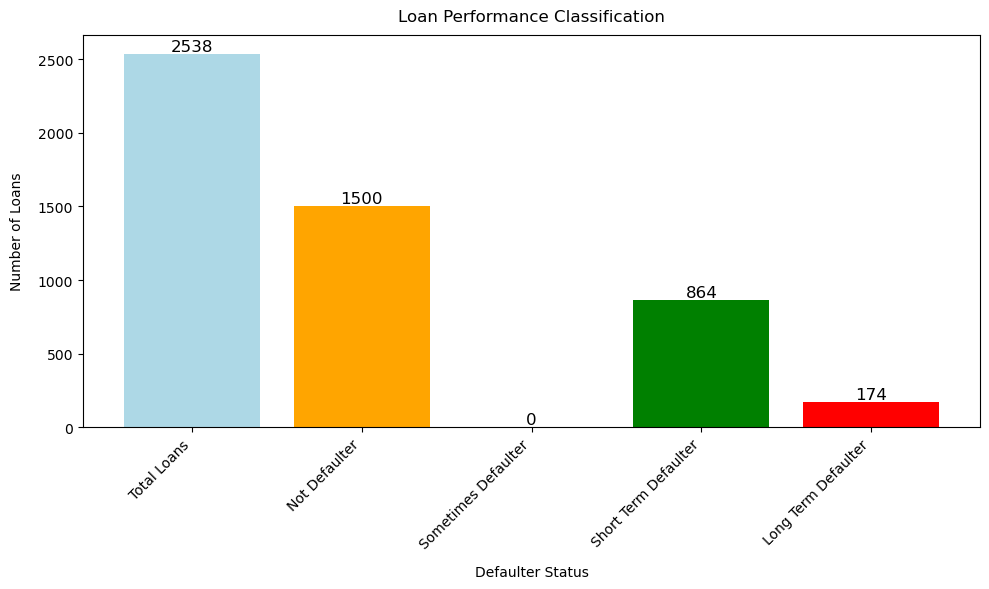

In [44]:
import matplotlib.pyplot as plt

# Count the number of loans in each defaulter category
category_counts = loan_performance_df['defaulter_status'].value_counts()

# Create a dictionary for the categories to ensure we capture all desired groups
category_names = ['Total Loans', 'Not Defaulter', 'Sometimes Defaulter', 'Short Term Defaulter', 'Long Term Defaulter']
loan_counts = {
    'Total Loans': len(loan_performance_df),
    'Not Defaulter': category_counts.get('Not Defaulter', 0),
    'Sometimes Defaulter': category_counts.get('Sometimes Defaulter (1-30 Days)', 0),
    'Short Term Defaulter': category_counts.get(f'Short Term Defaulter ({DPD_DEFAULT+1}-{DPD_SEVERE} Days)', 0),
    'Long Term Defaulter': category_counts.get(f'Long Term Defaulter (> {DPD_SEVERE} Days)', 0)
}

# Convert the loan counts dictionary into a pandas DataFrame
loan_counts_df = pd.DataFrame(list(loan_counts.items()), columns=['Defaulter Status', 'Loan Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(loan_counts_df['Defaulter Status'], loan_counts_df['Loan Count'], color=['lightblue', 'orange','purple', 'green', 'red'])

# Add labels and title
plt.xlabel('Defaulter Status', labelpad=10)
plt.ylabel('Number of Loans', labelpad=10)
plt.title('Loan Performance Classification', pad=10)

# Show the bar chart
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better visibility

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height (value) of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom', fontsize=12)  # Place the text above the bar

# Adjust layout to make room for the labels
plt.tight_layout()

# Show the plot
plt.show()

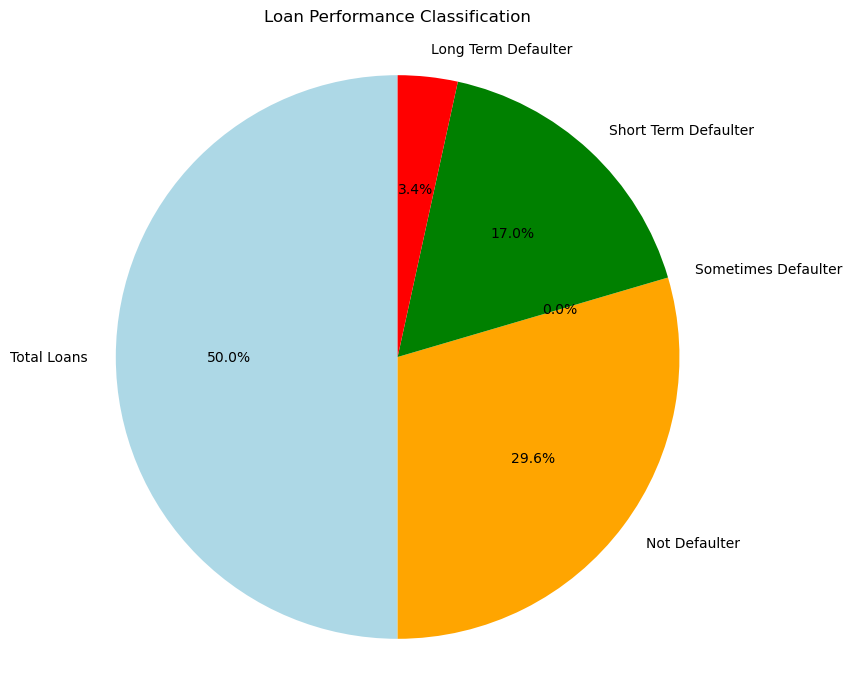

In [45]:
# Plot the pie chart showing the percentage of each defaulter category
plt.figure(figsize=(8, 8))

# Pie chart, where the slices will be ordered and labeled
plt.pie(loan_counts_df['Loan Count'], labels=loan_counts_df['Defaulter Status'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'purple','green', 'red'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Loan Performance Classification', pad=20)

# Show the plot
plt.show()